In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa
import os
import math
import shutil
import pandas as pd
import random

In [ ]:
BASE_PATH = '/kaggle/input/asvpoof-2019-dataset/LA/LA'

# change here
train_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt', sep=" ", header=None)

train_df.columns =['speaker_id','filename','system_id','null','class_name']
train_df.drop(columns=['null'],inplace=True)

#change here
train_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_train/flac/'+train_df.filename+'.flac'

train_df['target'] = (train_df.class_name=='spoof').astype('int32')
print('len Train', len(train_df))
train_df.head()

In [ ]:
playpath = f'{BASE_PATH}/ASVspoof2019_LA_dev/flac/LA_D_1001095.flac'
y, sr = librosa.load(playpath, sr=16000)
duration = len(y) / sr
print(duration)

In [ ]:
#change here
output_folder_0 = './audio_train/0'  # for bonafide
output_folder_1 = './audio_train/1'  # for spoof

if not os.path.exists(output_folder_0):
    os.makedirs(output_folder_0)

if not os.path.exists(output_folder_1):
    os.makedirs(output_folder_1)

for index, row in train_df.iterrows():
    source_filepath = row['filepath']

    #change here
    target_folder = f'./audio_train/{row["target"]}'
    
    target_filepath = os.path.join(target_folder, os.path.basename(source_filepath))
    
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    shutil.copy(source_filepath, target_filepath)

In [ ]:
nbonafide = len(os.listdir(output_folder_0))
nspoof = len(os.listdir(output_folder_1))

print(f'Number of Bonafide(0) Data {nbonafide}')
print(f'Number of Spoof Data(1) {nspoof}')

In [ ]:
#change here
folder_path = './audio_train/1' 

files = os.listdir(folder_path)

total_files = len(files)

#to remove imbalance
num_files_to_delete = nspoof-nbonafide

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

ndelete=0
for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
        # print(f"{file_name} Deleted.")
        ndelete += 1
    except Exception as e:
        print(f"Error while deleting: {e}")

print(f'{ndelete} files deleted from {folder_path}')

In [ ]:
print(f'Updated Number of files:')
print(f'Number of Bonafide(0) Data {len(os.listdir(output_folder_0))}')
print(f'Number of Spoof Data(1) {len(os.listdir(output_folder_1))}')

In [ ]:
### for creating folders for dev and eval
# change here
dev_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt', sep=" ", header=None)

dev_df.columns =['speaker_id','filename','system_id','null','class_name']
dev_df.drop(columns=['null'],inplace=True)

#change here
dev_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_dev/flac/'+dev_df.filename+'.flac'

dev_df['target'] = (dev_df.class_name=='spoof').astype('int32')
print('len dev', len(dev_df))
dev_df.head()

#change here
output_folder_0 = './audio_dev/0'  # for bonafide
output_folder_1 = './audio_dev/1'  # for spoof

if not os.path.exists(output_folder_0):
    os.makedirs(output_folder_0)

if not os.path.exists(output_folder_1):
    os.makedirs(output_folder_1)

for index, row in dev_df.iterrows():
    source_filepath = row['filepath']

    #change here
    target_folder = f'./audio_dev/{row["target"]}'
    
    target_filepath = os.path.join(target_folder, os.path.basename(source_filepath))
    
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    shutil.copy(source_filepath, target_filepath)

nbonafide = len(os.listdir(output_folder_0))
nspoof = len(os.listdir(output_folder_1))

print(f'Number of Bonafide(0) Data {nbonafide}')
print(f'Number of Spoof Data(1) {nspoof}')

#change here
folder_path = './audio_dev/1' 

files = os.listdir(folder_path)

total_files = len(files)

#to remove imbalance
num_files_to_delete = nspoof-nbonafide

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

ndelete=0
for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
        # print(f"{file_name} Deleted.")
        ndelete += 1
    except Exception as e:
        print(f"Error while deleting: {e}")

print(f'{ndelete} files deleted from {folder_path}')

print(f'Updated Number of files:')
print(f'Number of Bonafide(0) Data {len(os.listdir(output_folder_0))}')
print(f'Number of Spoof Data(1) {len(os.listdir(output_folder_1))}')

In [ ]:
### for creating folders for eval and dev
# change here
eval_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt', sep=" ", header=None)

eval_df.columns =['speaker_id','filename','system_id','null','class_name']
eval_df.drop(columns=['null'],inplace=True)

#change here
eval_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_eval/flac/'+eval_df.filename+'.flac'

eval_df['target'] = (eval_df.class_name=='spoof').astype('int32')
print('len eval', len(eval_df))
eval_df.head()

#change here
output_folder_0 = './audio_eval/0'  # for bonafide
output_folder_1 = './audio_eval/1'  # for spoof

if not os.path.exists(output_folder_0):
    os.makedirs(output_folder_0)

if not os.path.exists(output_folder_1):
    os.makedirs(output_folder_1)

for index, row in eval_df.iterrows():
    source_filepath = row['filepath']

    #change here
    target_folder = f'./audio_eval/{row["target"]}'
    
    target_filepath = os.path.join(target_folder, os.path.basename(source_filepath))
    
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    shutil.copy(source_filepath, target_filepath)

nbonafide = len(os.listdir(output_folder_0))
nspoof = len(os.listdir(output_folder_1))

print(f'Number of Bonafide(0) Data {nbonafide}')
print(f'Number of Spoof Data(1) {nspoof}')

#change here
folder_path = './audio_eval/1' 

files = os.listdir(folder_path)

total_files = len(files)

#to remove imbalance
num_files_to_delete = nspoof-nbonafide

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

ndelete=0
for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
        # print(f"{file_name} Deleted.")
        ndelete += 1
    except Exception as e:
        print(f"Error while deleting: {e}")

print(f'{ndelete} files deleted from {folder_path}')

print(f'Updated Number of files:')
print(f'Number of Bonafide(0) Data {len(os.listdir(output_folder_0))}')
print(f'Number of Spoof Data(1) {len(os.listdir(output_folder_1))}')

In [ ]:
TRAIN_DATASET_PATH = "/kaggle/working/audio_train"
VAL_DATASET_PATH = "/kaggle/working/audio_dev"
TEST_DATASET_PATH = "/kaggle/working/audio_eval"
TRAIN_JSON_PATH = "data_train.json"
VAL_JSON_PATH = "data_val.json"
TEST_JSON_PATH = "data_test.json"
SAMPLE_RATE = 16000
TRACK_DURATION = 4 
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=1024, hop_length=512, num_segments=5):

    
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        if dirpath is not dataset_path:

            
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

           
            for f in filenames:

                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                
                for d in range(num_segments):
                    
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
save_mfcc(TRAIN_DATASET_PATH, TRAIN_JSON_PATH, num_segments=2)

In [ ]:
save_mfcc(VAL_DATASET_PATH, VAL_JSON_PATH, num_segments=2)

### Run from here

In [363]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa
import os
import math
import shutil
import pandas as pd
import random

In [364]:
DATA_PATH = "./data_train.json"


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    print(len(X))
    return X, y

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    print(len(X))
    print(len(X_train))
    print(len(X_test))
    print(len(X_validation))
    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model


In [365]:
TRN_PATH = '/kaggle/input/pre-processed-data/data_train.json'
V_PATH = '/kaggle/input/pre-processed-data/data_val.json'
EVAL_PATH = '/kaggle/input/pre-processed-data/data_test.json'

In [366]:
x_t, y_t = load_data(TRN_PATH)
x_v, y_v = load_data(V_PATH)
X_train = np.concatenate((x_t, x_v), axis=0)
y_train = np.concatenate((y_t, y_v), axis=0)
# get train, validation, test splits
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
print(len(X_train))
print(len(X_validation))

6062
6182
9795
2449


In [367]:
TestX, TestY = load_data("/kaggle/input/pre-processed-data/data_test.json")

16037


In [381]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

def build_CNN_model(input_shape):
    model = keras.Sequential()

    # CNN layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.05))
    
    model.add(layers.Conv2D(64, (2, 2), activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.15))

    # Reshape for LSTM
    model.add(layers.Reshape((-1,64)))

    # LSTM layer
    model.add(layers.LSTM(128, return_sequences=False))

    # Dense layers
    model.add(layers.Dense(128, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


In [382]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# create network
input_shape = (X_train.shape[1], X_train.shape[2],1) # 130, 13
model = build_CNN_model(input_shape)

    
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        verbose=1,
        patience=5,
        mode='min',
        restore_best_weights=True,
    )
model.compile(optimizer=optimiser,
          loss='binary_crossentropy',
          metrics=['accuracy', 
                   keras.metrics.Recall()]
             )

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30,callbacks=[early_stopping],
)

# evaluate model on test set
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
# print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)                   │ (None, 61, 11, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_74 (MaxPooling2D)      │ (None, 31, 6, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 31, 6, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_104 (Dropout)                │ (None, 31, 6, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 30, 5, 64)           │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_75 (MaxPooling2D)      │ (None, 15, 3, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_75               │ (None, 15, 3, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_105 (Dropout)                │ (None, 15, 3, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_36 (Reshape)                 │ (None, 45, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_35 (LSTM)                       │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_106 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,417 (486.00 KB)

 Trainable params: 124,225 (485.25 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30


E0000 00:00:1751544017.039260      35 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_38_1/dropout_104_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


307/307 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5798 - loss: 0.8305 - recall_35: 0.5189 - val_accuracy: 0.8248 - val_loss: 0.5748 - val_recall_35: 0.8249
Epoch 2/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8382 - loss: 0.5254 - recall_35: 0.7678 - val_accuracy: 0.8387 - val_loss: 0.4837 - val_recall_35: 0.6972
Epoch 3/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8647 - loss: 0.4429 - recall_35: 0.8119 - val_accuracy: 0.8791 - val_loss: 0.4161 - val_recall_35: 0.7940
Epoch 4/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8842 - loss: 0.3920 - recall_35: 0.8586 - val_accuracy: 0.8947 - val_loss: 0.3578 - val_recall_35: 0.8424
Epoch 5/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8941 - loss: 0.3637 - recall_35: 0.8755 - val_accuracy: 0.8983 - val_loss: 0.3394 - val_recall_35: 0.9091
Epoch 6/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8927 - loss: 0.3523 - recall_35: 0.8769 - val_accuracy: 0.8918 - val_loss: 0.34

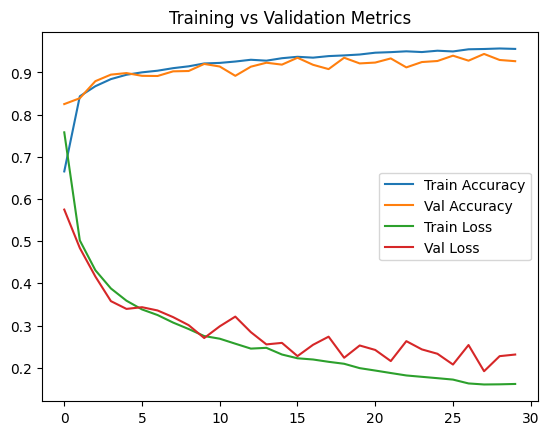

In [384]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Metrics")
plt.show()

In [383]:
model.save("/kaggle/working/audio_cnn.h5")